# Decision Tree


is a supervised (labeled data) machine learning algorithm that can be used for both classification and regression problems.

***It’s similar to the Tree Data Structure, which has a root, and multiple other types of nodes (parent, child, and leaf).
Decision Trees are a simple supervised learning model, which essentially means that the model has to be supplied with labelled training data using which it can makes its predictions. 

***It works in a greedy, top-down manner starting from the root node, containing some n number of branches, and ending with leaf nodes.***

Before we build our first tree, it's worth learning a bit about what they are and how they work. Below is a diagram showing the conceptual structure of a decision tree.

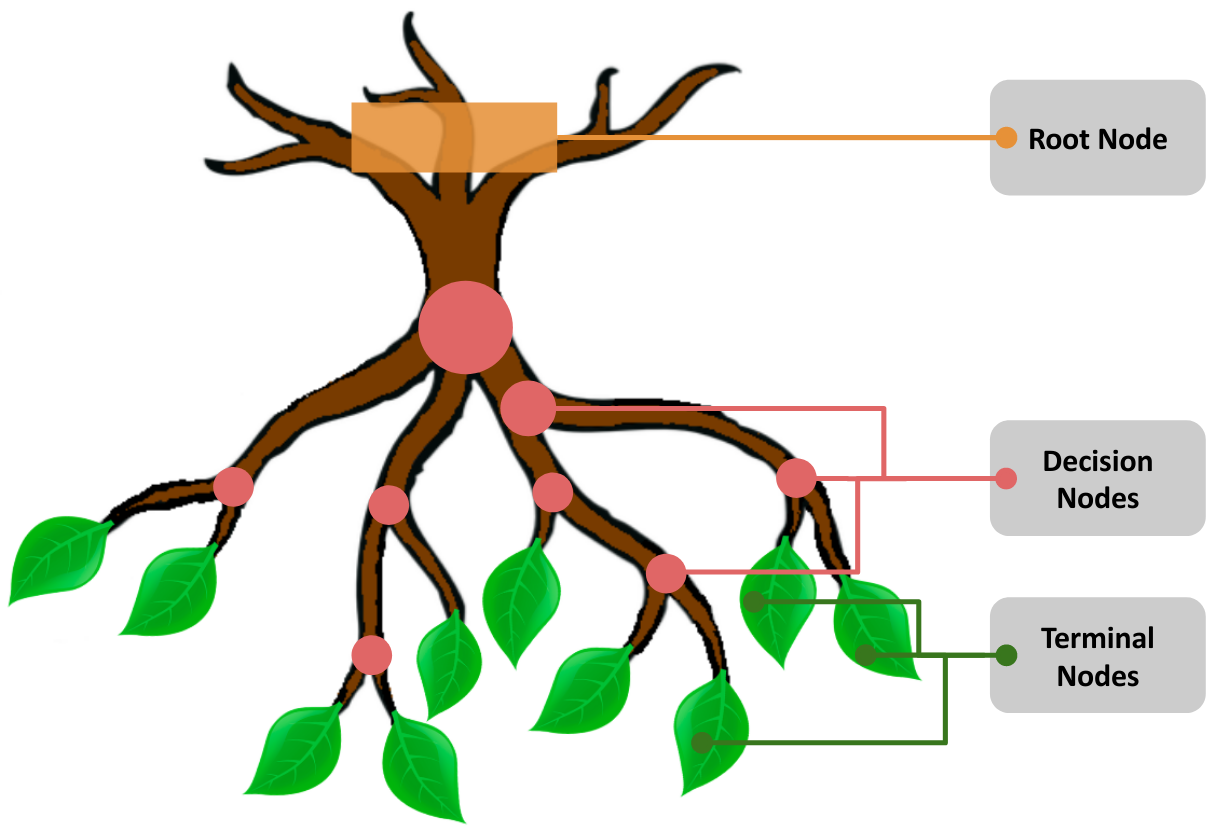


# In simple terms, decision trees are tree-like machine learning models which represent data by partitioning it into different sections based on questions asked of predictive variables in the data.

To make a decision on a new input:

We start at the root node, which is at the top of a upside down tree tree;

Ask questions at each decision node about the attributes of the input;

Repeat 2. until we reach a terminal node (also known as a leaf node) at the bottom of the upside-down tree.


Each terminal node in the tree contains a potential output (i.e.  Y
  value) for a given input  X
 . 
 The  Y   value at a terminal node only becomes the output of our decision tree if the path of decisions on an input  X
  from the root node lead to that particular terminal node.
  

Consider the following example of a new datapoint  X  with a value of 4.5. If we wanted to predict the  Y
  value for this new datapoint, the path that the input would follow along the decision tree is shown in green below:

# let us look about this example 
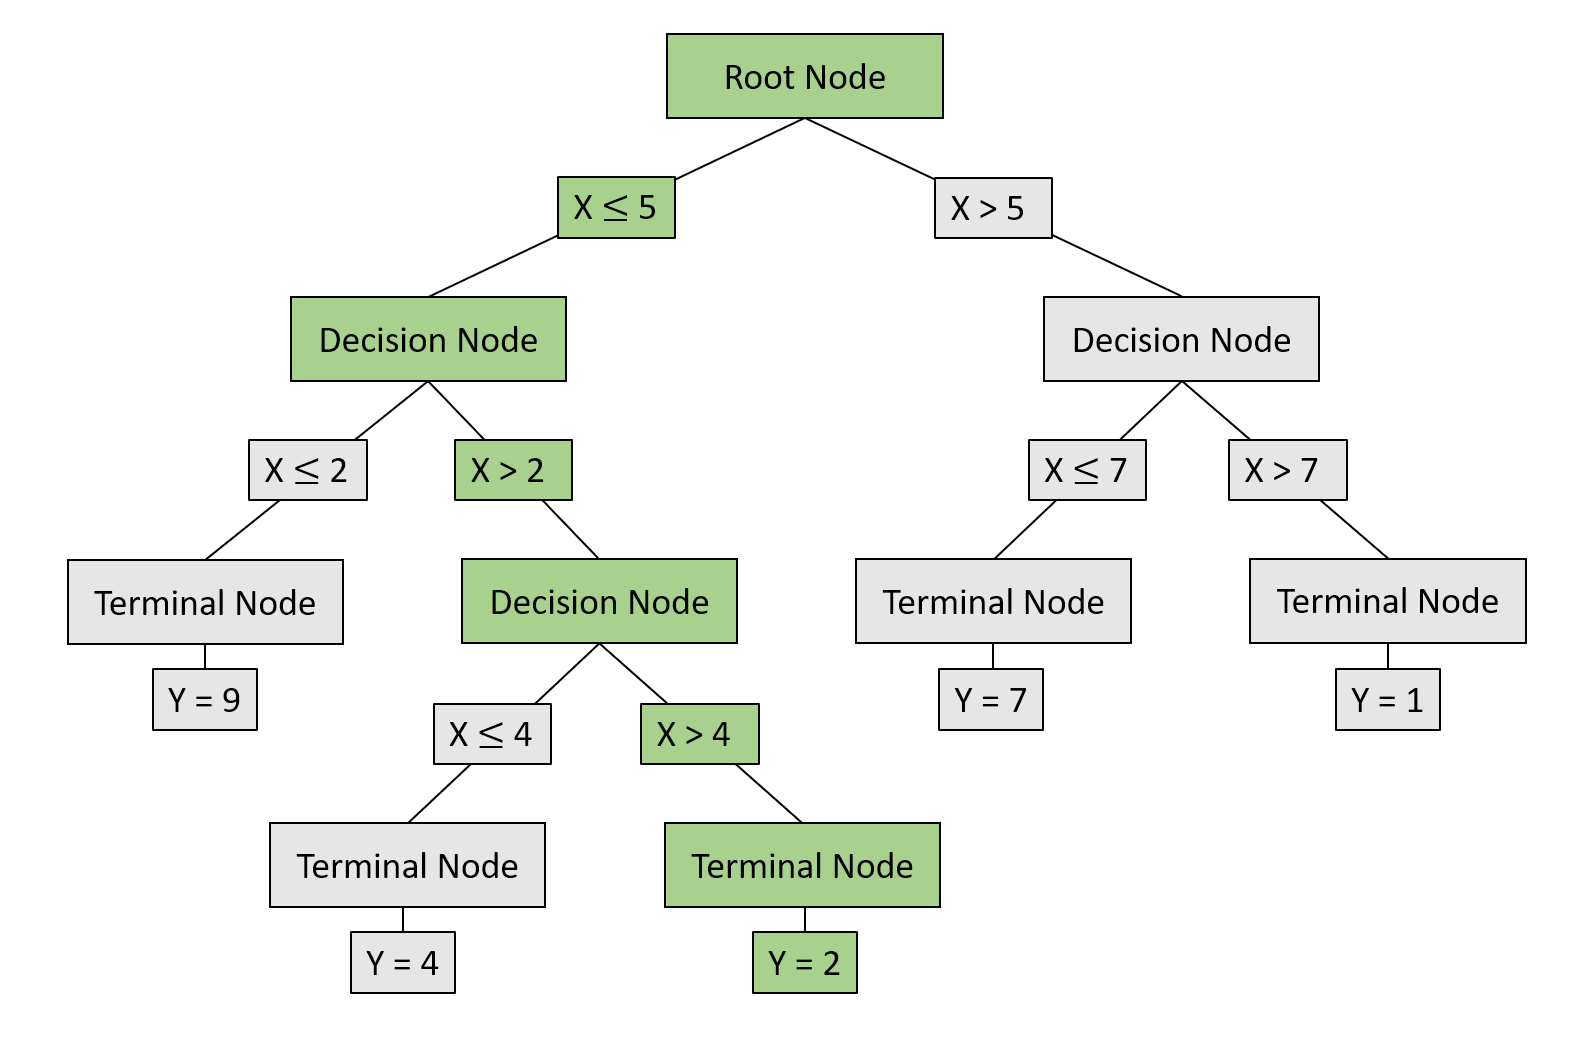

So the value of Y becomes 2 

In the decision process, datapoints start at the root node and end at a terminal node. The training process follows the same pattern.

In training a decision tree, we begin with all of our training data at the root node and then partition the data into smaller subsets which form the branches of the tree.

When partitioning the data, two questions need to be answered:

1. Which predictor variable should be used as the split criterion?

2. What value of the predictor variable should be used as the splitting point?

# PARTIONING
Partitioning in regression trees involves dividing the data at each node into two subsets through recursive binary splitting.

This process entails evaluating potential binary splits for each predictor variable and selecting the split that maximizes data separation. The optimal split point is determined based on its ability to minimize the mean squared error (MSE) for each side of the split. 

This process is repeated iteratively across all subsets until a desired stopping criterion is met. 

Ultimately, partitioning results in a tree structure where data is divided into distinct subsets, enabling the prediction of target variables for new observations based on their characteristics.

# EXAMPLE 

Imagine we have a dataset containing information about students, including their study hours and test scores. Our goal is to build a regression tree to predict students' final exam scores based on these two features.

1. We start with the entire dataset at the root node of the tree. Our objective is to partition the data into subsets that are as homogenous as possible in terms of final exam scores.

2. We consider each predictor variable (study hours and test scores) and evaluate potential binary splits. For instance, for study hours, we might consider splitting the data at different values like 3 hours, 5 hours, and so forth.

3. We calculate the mean final exam score for each subset resulting from the potential split and compute the mean squared error (MSE) for each side of the split. The split point that minimizes the MSE is selected as the best split for that predictor variable.

4. We compare the best splits across all predictor variables and choose the optimal one. This becomes the decision rule for the current node of the tree.

5. We divide the data into two subsets based on the selected split, creating two child nodes.

6. We repeat steps 1-5 for each subset until a stopping criterion is met. This could be a predefined maximum tree depth, a minimum number of data points in a node, or other criteria.

Through this process, the regression tree partitions the data into distinct subsets based on different combinations of study hours and test scores. Each partition represents a different group of students with similar characteristics. This partitioning allows us to predict students' final exam scores for new observations by traversing the tree and reaching the appropriate leaf node based on the input features.







In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


***We will be using the value of YearsExperience(independent variable) to try and predict the Salary (dependent variable)***

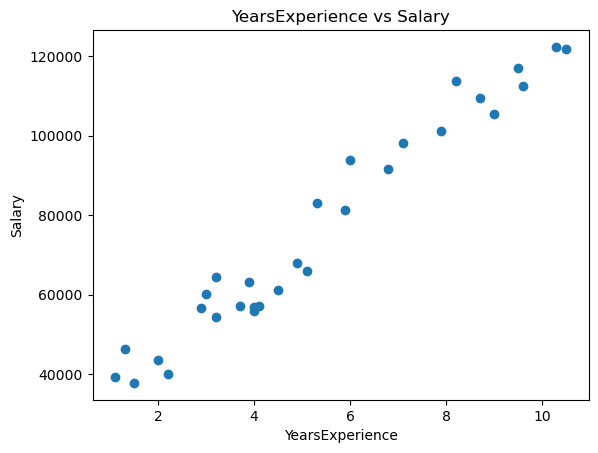

In [3]:
X = data["YearsExperience"] # independent variable
y = data["Salary"] # dependent variable

plt.scatter(X,y) # create scatter plot
plt.title("YearsExperience vs Salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

# Train-test split

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Building the decision tree
import the DecisionTreeRegressor class from the tree module of the sklearn library which will help us fit a decision tree to our dataset.



In [5]:
from sklearn.tree import DecisionTreeRegressor

After importing our Decision Tree Regressor model, we have to instantiate the model. This step also allows us to set model hyperparameters such as:

1. max_depth: The maximum depth of the tree (i.e. the number of nodes between root and leaf node);
2. criterion: The function to measure the quality of a split. The model uses the Mean Square Error (mse) by default;
3. random_state: A number used to seed the random number generator. Ensures that we get the same tree each time we call model.fit(); among other hyperparameters.


In [6]:
#Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=2,random_state=42)

In [7]:
#.fit to train our model
regr_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

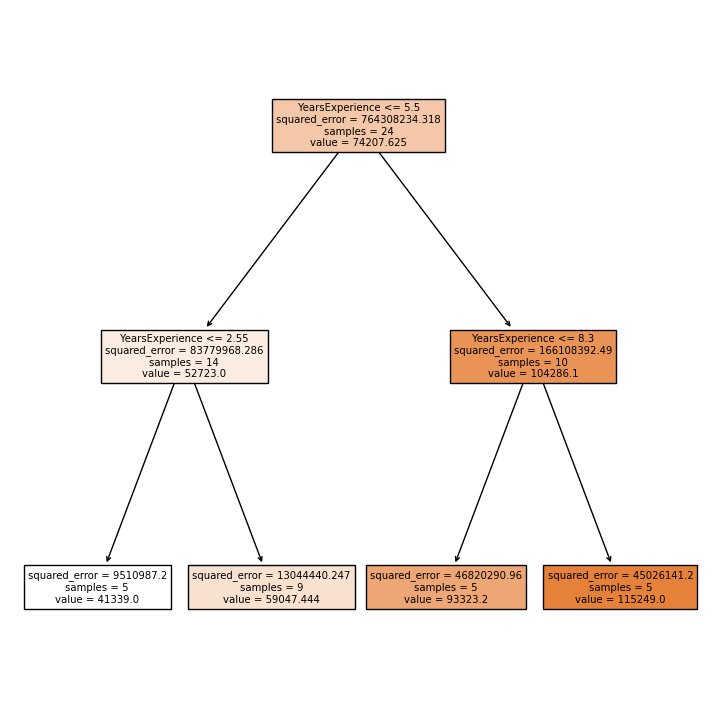

In [8]:
from sklearn.tree import plot_tree

plt.figure(figsize=(9,9))
# assigned a random variable name to the plot to suppress text output
_ = plot_tree(regr_tree, feature_names=['YearsExperience'],  filled=True)

# we have a fully-trained decision tree model and can easily make predictions by calling the .predict method.


***Evaluating model performance***


We evaluate model performance by by comparing the model's predictions on unseen data (x_test) with the actual output (y_test).
This comparison helps assess how well the model generalises to new data and provides insights into its predictive accuracy. We will use mean_squared_error for this.

In [9]:
from sklearn.metrics import mean_squared_error
# get predictions for test data
y_pred = regr_tree.predict(x_test)

# calculate MSE
MSE = mean_squared_error(y_pred,y_test)

# Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(MSE))

Regression Decision Tree model RMSE is: 13639.413676759032


In a regression decision tree model, the Root Mean Squared Error (RMSE) is a measure of the average deviation between the predicted values and the actual values of the target variable.

The RMSE value of 13639.41 suggests that, on average, the predicted salaries from your regression tree model deviate from the actual salaries by approximately $13639.41.

the RMSE value indicates the average discrepancy between the salaries predicted by the regression tree model and the actual salaries of employees. A higher RMSE value suggests that the model's predictions are less accurate, while a lower RMSE value indicates greater predictive accuracy.

***An RMSE of 13639.41 suggests that the model's predictions are off by approximately $13639.41, on average, when compared to the actual salaries. This means that there is room for improvement in the model's predictive performance, and further refinement may be necessary to reduce the prediction errors and enhance the model's accuracy.***



# Visualising model output


## Generate Equidistant Points:
First, we create a range of equidistant points along the x-axis. These points span from the minimum to the maximum X-values in the dataset.
We use np.linspace() from the NumPy library to generate 100 evenly spaced points between the minimum and maximum values of the predictor variable (X).
The [:, np.newaxis] is used to reshape the array into a column vector, ensuring compatibility with the prediction function


Predict y-values:
We then use the trained regression tree model (regr_tree) to predict the y-values (target variable) for every point in the x-domain.
The predict() function is applied to the x_domain array to obtain the predicted y-values.


Plotting:
We create a scatter plot of the original data points. This typically includes plotting the predictor variable (X) on the x-axis and the target variable (y) on the y-axis.
Then, we plot the predicted regression line over the scatter plot.
The predicted values from y_predictions are plotted against the equidistant points in x_domain, creating a step function that represents the regression tree predictions.
The color "red" is chosen for the line plot, and a label ('predictions') is provided for the legend.



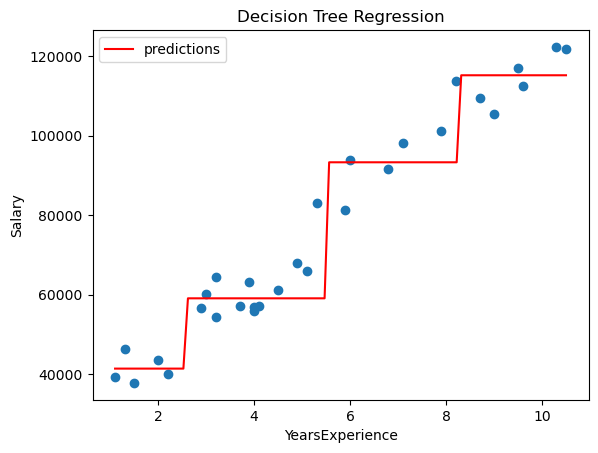

In [10]:
x_domain = np.linspace(min(X), max(X), 100)[:, np.newaxis]
# predict y for every point in x-domain
y_predictions = regr_tree.predict(x_domain)
# plot the regression tree line over data
plt.figure()
plt.scatter(X, y)
plt.plot(x_domain, y_predictions, color="red", label='predictions')
plt.title("Decision Tree Regression")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

plt.legend()
plt.show()

In a step function plot, the model's predictions are represented by discrete steps rather than smooth curves. Each step corresponds to a particular interval or region defined by the predictor variables in the dataset.

 These transitions represent the decision boundaries of the tree, where the predictor variables are partitioned into subsets.

# Advantages and Disadvantages of decision trees

**Advantages**

Easy to understand and use

Capable of handling both categorical and numerical data

Resilient to outliers, requiring minimal data preprocessing

Flexible for incorporating new features and can be extended to build larger classifiers using ensemble methods


**Disadvantages**

Prone to overfitting, especially with complex datasets

Requires careful parameter tuning to optimize performance

Susceptible to bias if certain classes dominate the dataset